In [17]:
import sys
sys.path.append('/mnt/c/Users/Prasa/OneDrive/dfenn-main')

import tensorflow as tf
from tensorflow import keras
from keras import *
from keras.models import Sequential
import keras_tuner as kt
import pickle
from modules.train_cnn import *
from modules.process_data import *
from modules.validate import *
import os

os.environ[
    "TF_CPP_MIN_LOG_LEVEL"
] = "3"  # this is to silence some of TF warning messages
import typer
from typing_extensions import Annotated


In [8]:
pwd

'/mnt/c/Users/Prasa/OneDrive/dfenn-main/All_notebooks_and_files_i_used_in_Star_Lab_project'

In [20]:
Dprime_model = tf.keras.models.load_model("../All_my_models/Dprime_model_trying_to_get_three_outputs/")
Dprime_model_with_Linh_mod = tf.keras.models.load_model('../All_my_models/Dprime_model_with_Linh_mods')


test_dprime_tensor = np.array(pickle.load(open('../processed_LD_data/test_data_Dprime_labeled_tensors', "rb")))
test_dprime_label = np.array(pickle.load(open('../processed_LD_data/test_data_Dprime_labeled_labels', 'rb')))


train_Dprime_tensors = np.array(pickle.load(open('../processed_LD_data/train_data_Dprime_labeled_tensors', 'rb')))
train_Dprime_labels = np.array(pickle.load(open('../processed_LD_data/train_data_Dprime_labeled_labels', 'rb')))


test_dprime_scrambled_tensors = np.array(pickle.load(open('../processed_LD_data/test_data_Dprime_scrambled_tensors', 'rb')))
test_dprime_free_scrambled_tensors = np.array(pickle.load(open('../processed_LD_data/test_data_Dprime_labeled_free_scrambled_tensors', 'rb')))

In [1]:
pwd

'/mnt/c/Users/Prasa/OneDrive/dfenn-main/All_notebooks_and_files_i_used_in_Star_Lab_project'

In [3]:
cd ..

/mnt/c/users/prasa/OneDrive/dfenn-main


In [3]:
train_Dprime_tensors.shape # Height: 20, Width: 300, Color: 2, Amount of tensors: 2423

(2423, 20, 300, 2)

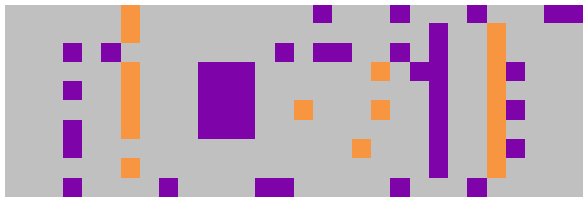

In [35]:
visualize_snp_tensor(train_Dprime_tensors[0][:10, :30, :2])

Epoch 1/30
76/76 [==============================] - 12s 138ms/step - loss: 0.0169 - mean_squared_error: 0.0169
Epoch 2/30
76/76 [==============================] - 9s 120ms/step - loss: 0.0082 - mean_squared_error: 0.0082
Epoch 3/30
76/76 [==============================] - 9s 118ms/step - loss: 0.0079 - mean_squared_error: 0.0079
Epoch 4/30
76/76 [==============================] - 9s 119ms/step - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 5/30
76/76 [==============================] - 9s 117ms/step - loss: 0.0079 - mean_squared_error: 0.0079
Epoch 6/30
76/76 [==============================] - 9s 113ms/step - loss: 0.0079 - mean_squared_error: 0.0079
Epoch 7/30
76/76 [==============================] - 9s 117ms/step - loss: 0.0079 - mean_squared_error: 0.0079
Epoch 8/30
76/76 [==============================] - 9s 118ms/step - loss: 0.0078 - mean_squared_error: 0.0078
Epoch 9/30
76/76 [==============================] - 9s 115ms/step - loss: 0.0078 - mean_squared_error: 0.0078
Epoch 10/

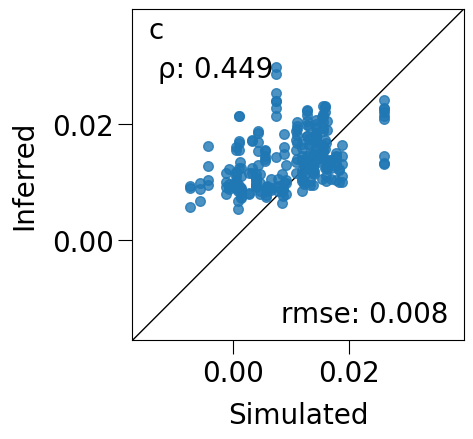

In [5]:
# THIS IS THE MODEL THAT LINH PROVIDED, CHECK HERE TO SEE IF YOUR CHANGES WORKED OR NOT

def create_dfe_cnn_linh(input_shape: tuple, n_outputs: int):
    model = Sequential()
    model.add(
        layers.Conv1D(
            filters=64,
            kernel_size=5,
            strides=2,
            input_shape=input_shape,
            activation="relu",
        )
    )
    # model.add(layers.Dropout(0.2))
    model.add(layers.Conv1D(filters=32, kernel_size=3, activation="relu"))
    model.add(layers.Conv1D(filters=16, kernel_size=2, strides=2, activation="relu"))
    model.add(layers.AveragePooling2D(pool_size=(20, 1)))
    model.add(layers.AveragePooling2D(pool_size=(1, 4)))
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(n_outputs))
    model.compile(optimizer="adam", loss="mse", metrics=["mean_squared_error"])

    return model, {}

Linh_architecture, kwargs = create_dfe_cnn_linh(train_Dprime_tensors.shape[1:], 3) # added empty relu layers after 2nd conv layer, 3rd conv, 1st pool

kwargs.update(
    x=train_Dprime_tensors,
    y=train_Dprime_labels,
    epochs=30,
)

callback = callbacks.EarlyStopping(monitor="val_loss", patience=5)
Linh_architecture.fit(**kwargs, callbacks=[callback])

plot_LD_results(Linh_architecture, test_dprime_tensor, test_dprime_label, "./Linh_mods_control_group")

In [ ]:
model_tester_dp, kwargs = create_dfe_cnn(train_Dprime_tensors.shape[1:], 3)

kwargs.update(
    x=train_Dprime_tensors,
    y=train_Dprime_labels,
    epochs=10,
)

callback = callbacks.EarlyStopping(monitor="val_loss", patience=5)
model_tester_dp.fit(**kwargs, callbacks=[callback])

In [ ]:
plot_LD_results(model_tester_dp, test_dprime_tensor, test_dprime_label, "./idk") #Added a RelU layer with no parameters

In [3]:
model_tester_dp_1, kwargs = create_dfe_cnn(train_Dprime_tensors.shape[1:], 3)

kwargs.update(
    x=train_Dprime_tensors,
    y=train_Dprime_labels,
    epochs=5,
)

callback = callbacks.EarlyStopping(monitor="val_loss", patience=5)
model_tester_dp_1.fit(**kwargs, callbacks=[callback])

Epoch 1/5
76/76 [==============================] - 12s 146ms/step - loss: 0.0217 - mean_squared_error: 0.0217
Epoch 2/5
76/76 [==============================] - 10s 130ms/step - loss: 0.0086 - mean_squared_error: 0.0086
Epoch 3/5
76/76 [==============================] - 10s 128ms/step - loss: 0.0081 - mean_squared_error: 0.0081
Epoch 4/5
76/76 [==============================] - 10s 131ms/step - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 5/5
76/76 [==============================] - 10s 131ms/step - loss: 0.0080 - mean_squared_error: 0.0080


8/8 [==============================] - 0s 43ms/step


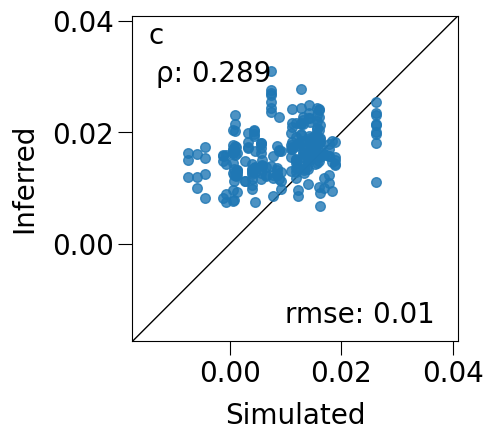

In [6]:
plot_LD_results(model_tester_dp_1, test_dprime_tensor, test_dprime_label, "./idk_1") # Added max_value=1.0 parameter to the ReLU layer after 2nd conv layer

In [ ]:
model_tester_dp_2, kwargs = create_dfe_cnn(train_Dprime_tensors.shape[1:], 3) # added an empty relu layer after 2nd conv layer then added max_value=1.0 relu layer just before first pooling layer

kwargs.update(
    x=train_Dprime_tensors,
    y=train_Dprime_labels,
    epochs=5,
)

callback = callbacks.EarlyStopping(monitor="val_loss", patience=5)
model_tester_dp_2.fit(**kwargs, callbacks=[callback])

plot_LD_results(model_tester_dp_2, test_dprime_tensor, test_dprime_label, "./Try3")

In [ ]:
model_tester_dp_3, kwargs = create_dfe_cnn(train_Dprime_tensors.shape[1:], 3) # added empty relu layers after 2nd conv layer, 3rd conv, 1st pool

kwargs.update(
    x=train_Dprime_tensors,
    y=train_Dprime_labels,
    epochs=5,
)

callback = callbacks.EarlyStopping(monitor="val_loss", patience=5)
model_tester_dp_3.fit(**kwargs, callbacks=[callback])

plot_LD_results(model_tester_dp_3, test_dprime_tensor, test_dprime_label, "./Try4")

In [ ]:
model_tester_dp_4, kwargs = create_dfe_cnn(train_Dprime_tensors.shape[1:], 3) # have empty relu layer after 2nd conv and 3rd conv

kwargs.update(
    x=train_Dprime_tensors,
    y=train_Dprime_labels,
    epochs=5,
)

callback = callbacks.EarlyStopping(monitor="val_loss", patience=5)
model_tester_dp_4.fit(**kwargs, callbacks=[callback])

plot_LD_results(model_tester_dp_4, test_dprime_tensor, test_dprime_label, "./Try5")

In [ ]:
model_tester_dp_5, kwargs = create_dfe_cnn(train_Dprime_tensors.shape[1:], 3) # changed pool size to (36,1) from (20, 1) in fist pool layer SCRATCH I MESSED UP

kwargs.update(
    x=train_Dprime_tensors,
    y=train_Dprime_labels,
    epochs=5,
)

callback = callbacks.EarlyStopping(monitor="val_loss", patience=5)
model_tester_dp_5.fit(**kwargs, callbacks=[callback])

plot_LD_results(model_tester_dp_5, test_dprime_tensor, test_dprime_label, "./Try5")

In [ ]:
model_tester_dp_6, kwargs = create_dfe_cnn(train_Dprime_tensors.shape[1:], 3) # still have (36, 1) as pool size in 1st avg pool layer but changed second pool layer pool size from (1,4) -> (1,2) SCRATCH

kwargs.update(
    x=train_Dprime_tensors,
    y=train_Dprime_labels,
    epochs=5,
)

callback = callbacks.EarlyStopping(monitor="val_loss", patience=5)
model_tester_dp_6.fit(**kwargs, callbacks=[callback])

plot_LD_results(model_tester_dp_6, test_dprime_tensor, test_dprime_label, "./Try6")

Epoch 1/5
76/76 [==============================] - 9s 110ms/step - loss: 0.0132 - mean_squared_error: 0.0132
Epoch 2/5
76/76 [==============================] - 8s 103ms/step - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 3/5
76/76 [==============================] - 8s 102ms/step - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 4/5
76/76 [==============================] - 8s 103ms/step - loss: 0.0079 - mean_squared_error: 0.0079
Epoch 5/5
8/8 [==============================] - 0s 37ms/step


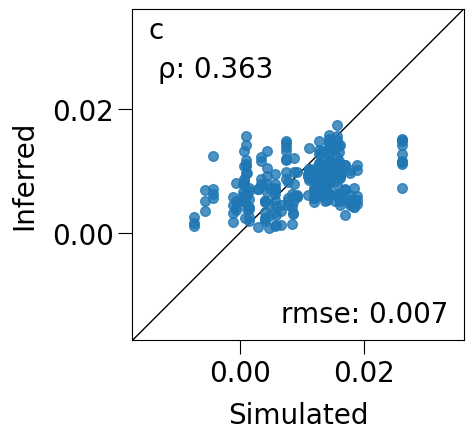

In [3]:
model_tester_dp_6, kwargs = create_dfe_cnn(train_Dprime_tensors.shape[1:], 3) 

kwargs.update(
    x=train_Dprime_tensors,
    y=train_Dprime_labels,
    epochs=5,
)

callback = callbacks.EarlyStopping(monitor="val_loss", patience=5)
model_tester_dp_6.fit(**kwargs, callbacks=[callback])

plot_LD_results(model_tester_dp_6, test_dprime_tensor, test_dprime_label, "./Try6")

Epoch 1/5
76/76 [==============================] - 13s 161ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 2/5
76/76 [==============================] - 13s 175ms/step - loss: 0.0082 - mean_squared_error: 0.0082
Epoch 3/5
76/76 [==============================] - 12s 155ms/step - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 4/5
76/76 [==============================] - 11s 147ms/step - loss: 0.0079 - mean_squared_error: 0.0079
Epoch 5/5
8/8 [==============================] - 1s 52ms/step


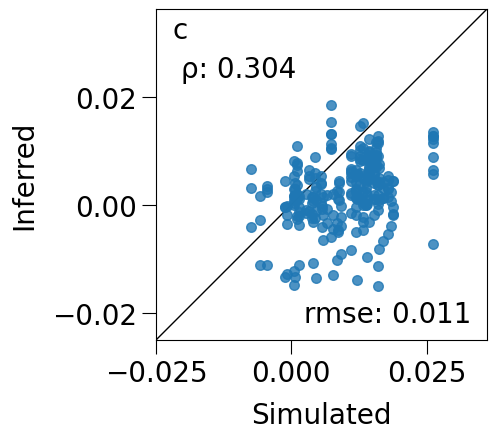

In [3]:
model_tester_dp_7, kwargs = create_dfe_cnn(train_Dprime_tensors.shape[1:], 3) # Trying to add an empty relu layer after the first conv layer/input layer

kwargs.update(
    x=train_Dprime_tensors,
    y=train_Dprime_labels,
    epochs=5,
)

callback = callbacks.EarlyStopping(monitor="val_loss", patience=5)
model_tester_dp_7.fit(**kwargs, callbacks=[callback])

plot_LD_results(model_tester_dp_7, test_dprime_tensor, test_dprime_label, "./Try7_not_very_good")

Epoch 1/5
76/76 [==============================] - 11s 132ms/step - loss: 0.0172 - mean_squared_error: 0.0172
Epoch 2/5
76/76 [==============================] - 9s 123ms/step - loss: 0.0084 - mean_squared_error: 0.0084
Epoch 3/5
76/76 [==============================] - 9s 118ms/step - loss: 0.0081 - mean_squared_error: 0.0081
Epoch 4/5
76/76 [==============================] - 9s 118ms/step - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 5/5
8/8 [==============================] - 0s 32ms/step


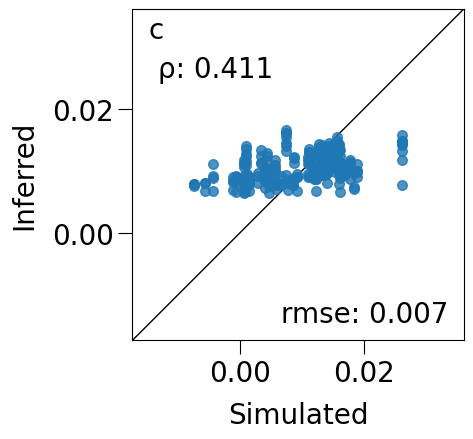

In [3]:
model_tester_dp_8, kwargs = create_dfe_cnn(train_Dprime_tensors.shape[1:], 3) # added model.add(layers.Conv1D(filters=8, kernel_size=1, strides=1, activation="relu")) after 3rd conv layer      DIDN'T DO WELL

kwargs.update(
    x=train_Dprime_tensors,
    y=train_Dprime_labels,
    epochs=5,
)

callback = callbacks.EarlyStopping(monitor="val_loss", patience=5)
model_tester_dp_8.fit(**kwargs, callbacks=[callback])

plot_LD_results(model_tester_dp_8, test_dprime_tensor, test_dprime_label, "./Try8")

Epoch 1/5
76/76 [==============================] - 7s 85ms/step - loss: 0.0123 - mean_squared_error: 0.0123
Epoch 2/5
76/76 [==============================] - 6s 78ms/step - loss: 0.0081 - mean_squared_error: 0.0081
Epoch 3/5
76/76 [==============================] - 6s 78ms/step - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 4/5
76/76 [==============================] - 6s 84ms/step - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 5/5
8/8 [==============================] - 0s 34ms/step


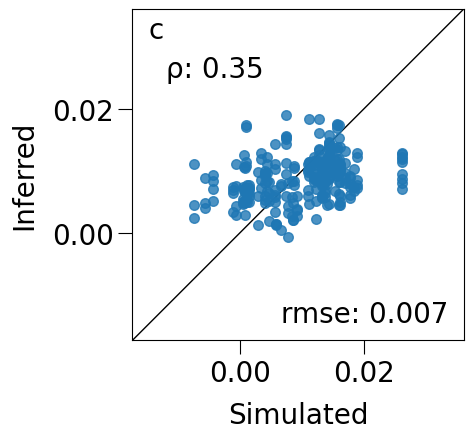

In [3]:
model_tester_dp_9, kwargs = create_dfe_cnn(train_Dprime_tensors.shape[1:], 3) # made the second conv layer have a strides=2 when it didn't have any parameter before. 2nd run: adding empy relu after 2nd conv layer -> Led to an ok result, looks similar to what Linh suggested
kwargs.update(
    x=train_Dprime_tensors,
    y=train_Dprime_labels,
    epochs=5,
)

callback = callbacks.EarlyStopping(monitor="val_loss", patience=5)
model_tester_dp_9.fit(**kwargs, callbacks=[callback])

plot_LD_results(model_tester_dp_9, test_dprime_tensor, test_dprime_label, "./Try9_2")

Epoch 1/5
76/76 [==============================] - 8s 98ms/step - loss: 0.0150 - mean_squared_error: 0.0150
Epoch 2/5
76/76 [==============================] - 7s 94ms/step - loss: 0.0081 - mean_squared_error: 0.0081
Epoch 3/5
76/76 [==============================] - 8s 103ms/step - loss: 0.0079 - mean_squared_error: 0.0079
Epoch 4/5
76/76 [==============================] - 8s 103ms/step - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 5/5
8/8 [==============================] - 0s 31ms/step


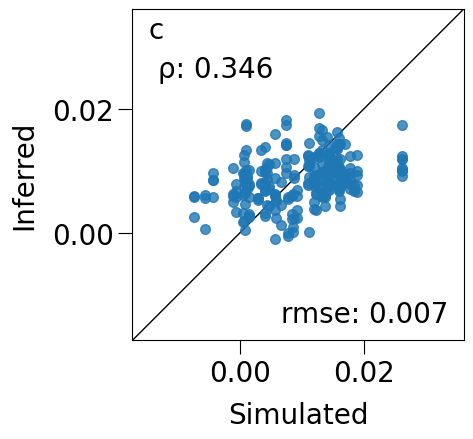

In [8]:
def create_dfe_cnn_1(input_shape: tuple, n_outputs: int):
    model = Sequential()
    model.add(
        layers.Conv1D(
            filters=64,
            kernel_size=5,
            strides=2,
            input_shape=input_shape,
            activation="relu",
        )
    )
    # model.add(layers.Dropout(0.2))
    model.add(layers.Conv1D(filters=32, kernel_size=3, strides=2, activation="relu", use_bias=True)) # Trying to add bias to see if it will work
    model.add(layers.ReLU())
    model.add(layers.Conv1D(filters=16, kernel_size=2, strides=2, activation="relu"))
    model.add(layers.AveragePooling2D(pool_size=(20, 1)))
    model.add(layers.AveragePooling2D(pool_size=(1, 4)))
    model.add(layers.GlobalAveragePooling2D())
    # model.add(layers.Dense(10, activation='relu')) # Gonna try dis -> Didn't work, it brought rmse up from 0.006 to 0.007
    model.add(layers.Dense(n_outputs)) # Used to have relu activation
    model.compile(optimizer="adam", loss="mse", metrics=["mean_squared_error"])

    return model, {}


new_day_model, kwargs = create_dfe_cnn_1(train_Dprime_tensors.shape[1:], 3) 
kwargs.update(
    x=train_Dprime_tensors,
    y=train_Dprime_labels,
    epochs=5,
)

callback = callbacks.EarlyStopping(monitor="val_loss", patience=5)
new_day_model.fit(**kwargs, callbacks=[callback])

plot_LD_results(new_day_model, test_dprime_tensor, test_dprime_label, "./Try10")

Epoch 1/5
76/76 [==============================] - 7s 85ms/step - loss: 0.0157 - mean_squared_error: 0.0157
Epoch 2/5
76/76 [==============================] - 6s 74ms/step - loss: 0.0082 - mean_squared_error: 0.0082
Epoch 3/5
76/76 [==============================] - 6s 75ms/step - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 4/5
76/76 [==============================] - 6s 77ms/step - loss: 0.0082 - mean_squared_error: 0.0082
Epoch 5/5
4/4 [==============================] - 0s 20ms/step


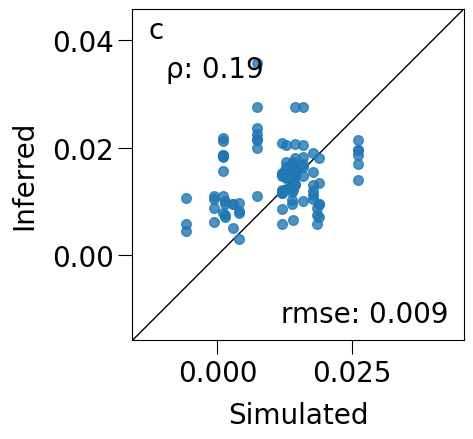

In [16]:
def create_dfe_cnn_1(input_shape: tuple, n_outputs: int): #
    model = Sequential()
    model.add(
        layers.Conv1D(
            filters=64,
            kernel_size=5,
            strides=2,
            input_shape=input_shape,
            activation="relu",
        )
    )
    # model.add(layers.Dropout(0.2))
    model.add(layers.Conv1D(filters=32, kernel_size=3, strides=2, activation="relu", use_bias=True)) # Trying to add bias to see if it will work
    model.add(layers.ReLU())
    model.add(layers.Conv1D(filters=16, kernel_size=2, strides=2, activation="relu"))
    model.add(layers.AveragePooling2D(pool_size=(20, 1)))
    model.add(layers.AveragePooling2D(pool_size=(1, 4)))
    model.add(layers.GlobalAveragePooling2D())
    # model.add(layers.Dense(10, activation='relu')) # Gonna try dis -> Didn't work, it brought rmse up from 0.006 to 0.007
    model.add(layers.Dense(n_outputs)) # Used to have relu activation
    model.compile(optimizer="adam", loss="mse", metrics=["mean_squared_error"])

    return model, {}


new_day_model, kwargs = create_dfe_cnn_1(train_Dprime_tensors.shape[1:], 3) 
kwargs.update(
    x=train_Dprime_tensors,
    y=train_Dprime_labels,
    epochs=5,
)

callback = callbacks.EarlyStopping(monitor="val_loss", patience=5)
new_day_model.fit(**kwargs, callbacks=[callback])

plot_LD_results(new_day_model, test_dprime_tensor[:100], test_dprime_label[:100], "./Try11_with_smaller_data")

In [ ]:
# So this probably means my CNN is not learning much and the points on the line seem like noise

Epoch 1/5
76/76 [==============================] - 13s 130ms/step - loss: 0.0171 - mean_squared_error: 0.0171
Epoch 2/5
76/76 [==============================] - 9s 121ms/step - loss: 0.0085 - mean_squared_error: 0.0085
Epoch 3/5
76/76 [==============================] - 9s 113ms/step - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 4/5
76/76 [==============================] - 9s 122ms/step - loss: 0.0079 - mean_squared_error: 0.0079
Epoch 5/5
8/8 [==============================] - 0s 31ms/step


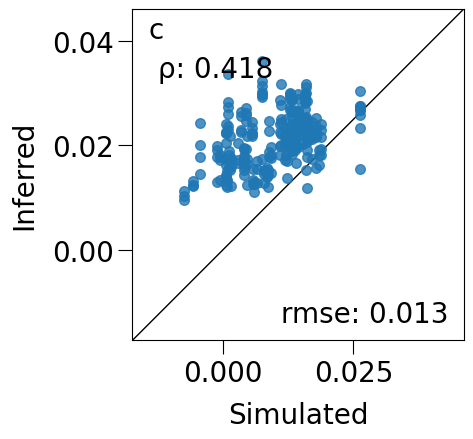

In [41]:
def create_dfe_cnn_1(input_shape: tuple, n_outputs: int): #
    model = Sequential()
    model.add(
        layers.Conv1D(
            filters=64,
            kernel_size=5,
            strides=2,
            input_shape=input_shape,
            activation="relu",
        )
    )
    # model.add(layers.Dropout(0.2))
    model.add(layers.Conv1D(filters=32, kernel_size=3, strides=1, activation="relu", use_bias=True)) # Made stride from 2 to 1 (made the outputs trend be mode diagonal but off more)
    model.add(layers.ReLU())
    model.add(layers.Conv1D(filters=16, kernel_size=2, strides=2, activation="relu"))
    model.add(layers.AveragePooling2D(pool_size=(20, 1)))
    model.add(layers.AveragePooling2D(pool_size=(1, 4)))
    model.add(layers.GlobalAveragePooling2D())
    # model.add(layers.Dense(10, activation='relu')) # Gonna try dis -> Didn't work, it brought rmse up from 0.006 to 0.007
    model.add(layers.Dense(n_outputs)) # Used to have relu activation
    model.compile(optimizer="adam", loss="mse", metrics=["mean_squared_error"])

    return model, {}


new_day_model, kwargs = create_dfe_cnn_1(train_Dprime_tensors.shape[1:], 3) 
kwargs.update(
    x=train_Dprime_tensors,
    y=train_Dprime_labels,
    epochs=5,
)

callback = callbacks.EarlyStopping(monitor="val_loss", patience=5)
new_day_model.fit(**kwargs, callbacks=[callback])

plot_LD_results(new_day_model, test_dprime_tensor, test_dprime_label, "./Try12_with_smaller_data")

Epoch 1/5
76/76 [==============================] - 8s 87ms/step - loss: 0.0162 - mean_squared_error: 0.0162
Epoch 2/5
76/76 [==============================] - 6s 79ms/step - loss: 0.0084 - mean_squared_error: 0.0084
Epoch 3/5
76/76 [==============================] - 6s 78ms/step - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 4/5
76/76 [==============================] - 6s 79ms/step - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 5/5
4/4 [==============================] - 0s 20ms/step


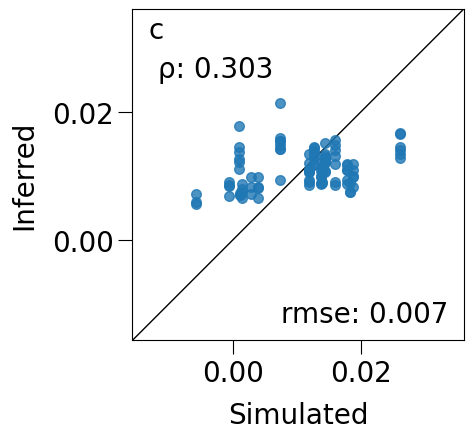

In [42]:
def create_dfe_cnn_1(input_shape: tuple, n_outputs: int): #
    model = Sequential()
    model.add(
        layers.Conv1D(
            filters=64,
            kernel_size=5,
            strides=2,
            input_shape=input_shape,
            activation="relu",
        )
    )
    # model.add(layers.Dropout(0.2))
    model.add(layers.Conv1D(filters=32, kernel_size=3, strides=2, activation="relu", use_bias=True)) # Trying to add bias to see if it will work
    model.add(layers.ReLU())
    model.add(layers.Conv1D(filters=16, kernel_size=2, strides=2, activation="relu"))
    model.add(layers.AveragePooling2D(pool_size=(20, 1)))
    model.add(layers.AveragePooling2D(pool_size=(1, 4)))
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(10, activation='relu')) # Gonna try dis -> Didn't work, it brought rmse up from 0.006 to 0.007
    model.add(layers.Dense(n_outputs)) # Used to have relu activation
    model.compile(optimizer="adam", loss="mse", metrics=["mean_squared_error"])

    return model, {}


new_day_model, kwargs = create_dfe_cnn_1(train_Dprime_tensors.shape[1:], 3) 
kwargs.update(
    x=train_Dprime_tensors,
    y=train_Dprime_labels,
    epochs=5,
)

callback = callbacks.EarlyStopping(monitor="val_loss", patience=5)
new_day_model.fit(**kwargs, callbacks=[callback])

plot_LD_results(new_day_model, test_dprime_tensor, test_dprime_label, "./Try11_with_smaller_data")

8/8 [==============================] - 0s 25ms/step


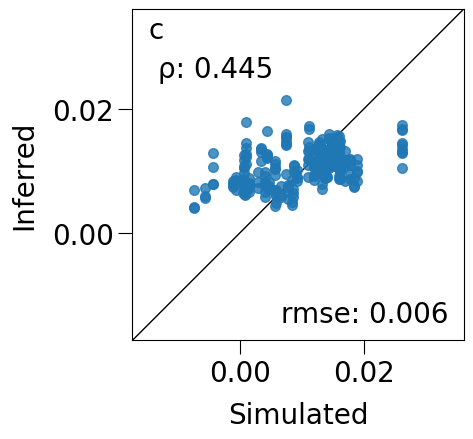

In [43]:
plot_LD_results(new_day_model, test_dprime_tensor, test_dprime_label, "./Try11_with_smaller_data")

Epoch 1/5
76/76 [==============================] - 8s 87ms/step - loss: 0.0346 - mean_squared_error: 0.0346
Epoch 2/5
76/76 [==============================] - 6s 79ms/step - loss: 0.0104 - mean_squared_error: 0.0104
Epoch 3/5
76/76 [==============================] - 6s 76ms/step - loss: 0.0089 - mean_squared_error: 0.0089
Epoch 4/5
76/76 [==============================] - 6s 78ms/step - loss: 0.0087 - mean_squared_error: 0.0087
Epoch 5/5
8/8 [==============================] - 0s 23ms/step


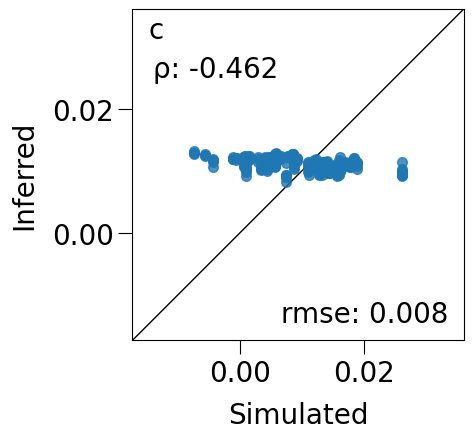

In [44]:
def create_dfe_cnn_1(input_shape: tuple, n_outputs: int): #
    model = Sequential()
    model.add(
        layers.Conv1D(
            filters=64,
            kernel_size=5,
            strides=2,
            input_shape=input_shape,
            activation="relu",
        )
    )
    # model.add(layers.Dropout(0.2))
    model.add(layers.Conv1D(filters=32, kernel_size=3, strides=2, activation="relu", use_bias=True)) # Trying to add bias to see if it will work
    model.add(layers.ReLU())
    model.add(layers.Conv1D(filters=16, kernel_size=2, strides=2, activation="relu"))
    model.add(layers.AveragePooling2D(pool_size=(20, 1)))
    model.add(layers.AveragePooling2D(pool_size=(1, 4)))
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(10, activation='relu')) # Gonna try dis -> Didn't work, it brought rmse up from 0.006 to 0.007
    model.add(layers.Dense(5, activation='relu'))
    model.add(layers.Dense(n_outputs)) # Used to have relu activation
    model.compile(optimizer="adam", loss="mse", metrics=["mean_squared_error"])

    return model, {}


new_day_model, kwargs = create_dfe_cnn_1(train_Dprime_tensors.shape[1:], 3) 
kwargs.update(
    x=train_Dprime_tensors,
    y=train_Dprime_labels,
    epochs=5,
)

callback = callbacks.EarlyStopping(monitor="val_loss", patience=5)
new_day_model.fit(**kwargs, callbacks=[callback])

plot_LD_results(new_day_model, test_dprime_tensor, test_dprime_label, "./Try13")

Epoch 1/5
76/76 [==============================] - 7s 84ms/step - loss: 0.0180 - mean_squared_error: 0.0180
Epoch 2/5
76/76 [==============================] - 7s 88ms/step - loss: 0.0084 - mean_squared_error: 0.0084
Epoch 3/5
76/76 [==============================] - 7s 88ms/step - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 4/5
76/76 [==============================] - 6s 84ms/step - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 5/5
8/8 [==============================] - 0s 24ms/step


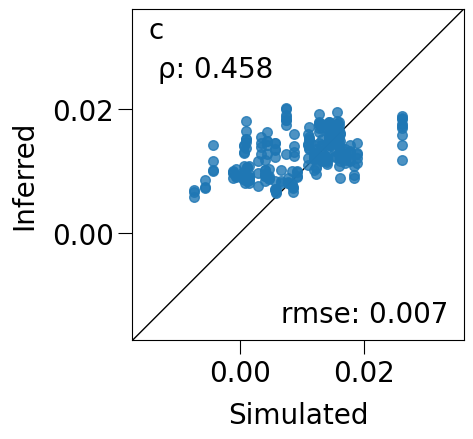

In [46]:
def create_dfe_cnn_1(input_shape: tuple, n_outputs: int): #
    model = Sequential()
    model.add(
        layers.Conv1D(
            filters=64,
            kernel_size=5,
            strides=2,
            input_shape=input_shape,
            activation="relu",
        )
    )
    # model.add(layers.Dropout(0.2))
    model.add(layers.Conv1D(filters=32, kernel_size=3, strides=2, activation="relu", use_bias=True)) # Trying to add bias to see if it will work
    model.add(layers.ReLU())
    model.add(layers.Conv1D(filters=16, kernel_size=2, strides=2, activation="relu"))
    model.add(layers.AveragePooling2D(pool_size=(20, 1)))
    model.add(layers.AveragePooling2D(pool_size=(1, 4)))
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(5, activation='relu')) # 10 to 5 dense layer
    model.add(layers.Dense(n_outputs)) # Used to have relu activation
    model.compile(optimizer="adam", loss="mse", metrics=["mean_squared_error"])

    return model, {}


new_day_model, kwargs = create_dfe_cnn_1(train_Dprime_tensors.shape[1:], 3) 
kwargs.update(
    x=train_Dprime_tensors,
    y=train_Dprime_labels,
    epochs=5,
)

callback = callbacks.EarlyStopping(monitor="val_loss", patience=5)
new_day_model.fit(**kwargs, callbacks=[callback])

plot_LD_results(new_day_model, test_dprime_tensor, test_dprime_label, "./Try11_with_smaller_data")

Epoch 1/5
76/76 [==============================] - 19s 237ms/step - loss: 0.0156 - mean_squared_error: 0.0156
Epoch 2/5
76/76 [==============================] - 17s 224ms/step - loss: 0.0084 - mean_squared_error: 0.0084
Epoch 3/5
76/76 [==============================] - 18s 243ms/step - loss: 0.0081 - mean_squared_error: 0.0081
Epoch 4/5
76/76 [==============================] - 18s 236ms/step - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 5/5
8/8 [==============================] - 1s 67ms/step


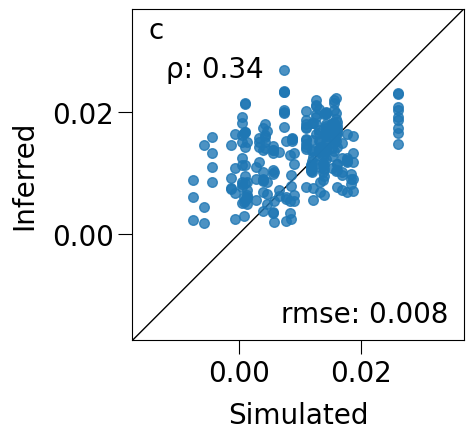

In [47]:
def create_dfe_cnn_1(input_shape: tuple, n_outputs: int): #
    model = Sequential()
    model.add(
        layers.Conv1D(
            filters=64,
            kernel_size=5,
            strides=1,
            input_shape=input_shape,
            activation="relu",
        )
    )
    # model.add(layers.Dropout(0.2))
    model.add(layers.Conv1D(filters=32, kernel_size=3, strides=1, activation="relu", use_bias=True)) # Trying to add bias to see if it will work
    model.add(layers.ReLU())
    model.add(layers.Conv1D(filters=16, kernel_size=2, strides=3, activation="relu"))
    model.add(layers.AveragePooling2D(pool_size=(20, 1)))
    model.add(layers.AveragePooling2D(pool_size=(1, 4)))
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(10, activation='relu')) # 10 to 5 dense layer
    model.add(layers.Dense(n_outputs)) # Used to have relu activation
    model.compile(optimizer="adam", loss="mse", metrics=["mean_squared_error"])

    return model, {}


new_day_model, kwargs = create_dfe_cnn_1(train_Dprime_tensors.shape[1:], 3) 
kwargs.update(
    x=train_Dprime_tensors,
    y=train_Dprime_labels,
    epochs=5,
)

callback = callbacks.EarlyStopping(monitor="val_loss", patience=5)
new_day_model.fit(**kwargs, callbacks=[callback])

plot_LD_results(new_day_model, test_dprime_tensor, test_dprime_label, "./Try11_with_smaller_data")

Epoch 1/10
76/76 [==============================] - 11s 134ms/step - loss: 0.0242 - mean_squared_error: 0.0242
Epoch 2/10
76/76 [==============================] - 10s 129ms/step - loss: 0.0092 - mean_squared_error: 0.0092
Epoch 3/10
76/76 [==============================] - 10s 136ms/step - loss: 0.0082 - mean_squared_error: 0.0082
Epoch 4/10
76/76 [==============================] - 10s 130ms/step - loss: 0.0082 - mean_squared_error: 0.0082
Epoch 5/10
76/76 [==============================] - 9s 124ms/step - loss: 0.0081 - mean_squared_error: 0.0081
Epoch 6/10
76/76 [==============================] - 9s 125ms/step - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 7/10
76/76 [==============================] - 9s 125ms/step - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 8/10
76/76 [==============================] - 9s 124ms/step - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 9/10
76/76 [==============================] - 9s 121ms/step - loss: 0.0078 - mean_squared_error: 0.0078
Epoch 

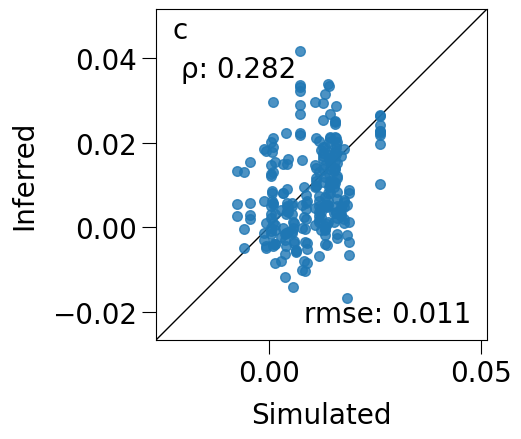

In [49]:
def create_dfe_cnn_1(input_shape: tuple, n_outputs: int): #
    model = Sequential()
    model.add(
        layers.Conv1D(
            filters=64,
            kernel_size=5,
            strides=2,
            input_shape=input_shape,
            activation="relu",
        )
    )
    # model.add(layers.Dropout(0.2))
    model.add(layers.Conv1D(filters=32, kernel_size=3, activation="relu", use_bias=True)) # Trying to add bias to see if it will work
    model.add(layers.ReLU())
    model.add(layers.Conv1D(filters=16, kernel_size=2, strides=2, activation="relu"))
    model.add(layers.AveragePooling2D(pool_size=(20, 1)))
    model.add(layers.AveragePooling2D(pool_size=(1, 4)))
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(10, activation='relu')) # 10 to 5 dense layer
    model.add(layers.Dense(n_outputs)) # Used to have relu activation
    model.compile(optimizer="adam", loss="mse", metrics=["mean_squared_error"])

    return model, {}


new_day_model, kwargs = create_dfe_cnn_1(train_Dprime_tensors.shape[1:], 3) 
kwargs.update(
    x=train_Dprime_tensors,
    y=train_Dprime_labels,
    epochs=10,
)

callback = callbacks.EarlyStopping(monitor="val_loss", patience=5)
new_day_model.fit(**kwargs, callbacks=[callback])

plot_LD_results(new_day_model, test_dprime_tensor, test_dprime_label, "./Try15")

Epoch 1/30
76/76 [==============================] - 11s 130ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 2/30
76/76 [==============================] - 9s 121ms/step - loss: 0.0084 - mean_squared_error: 0.0084
Epoch 3/30
76/76 [==============================] - 10s 127ms/step - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 4/30
76/76 [==============================] - 10s 126ms/step - loss: 0.0079 - mean_squared_error: 0.0079
Epoch 5/30
76/76 [==============================] - 10s 125ms/step - loss: 0.0079 - mean_squared_error: 0.0079
Epoch 6/30
76/76 [==============================] - 10s 127ms/step - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 7/30
76/76 [==============================] - 10s 130ms/step - loss: 0.0079 - mean_squared_error: 0.0079
Epoch 8/30
76/76 [==============================] - 10s 129ms/step - loss: 0.0079 - mean_squared_error: 0.0079
Epoch 9/30
76/76 [==============================] - 10s 126ms/step - loss: 0.0078 - mean_squared_error: 0.0078
Ep

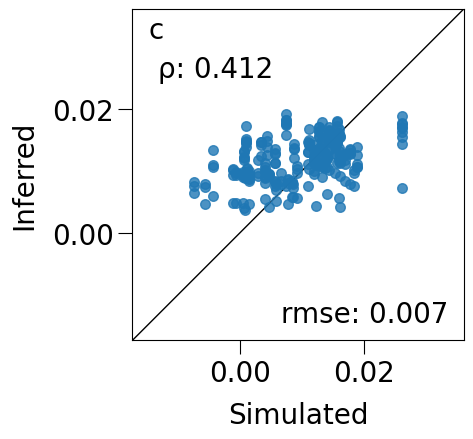

In [50]:
def create_dfe_cnn_1(input_shape: tuple, n_outputs: int): #
    model = Sequential()
    model.add(
        layers.Conv1D(
            filters=64,
            kernel_size=5,
            strides=2,
            input_shape=input_shape,
            activation="relu",
        )
    )
    # model.add(layers.Dropout(0.2))
    model.add(layers.Conv1D(filters=32, kernel_size=3, activation="relu", use_bias=True)) # Trying to add bias to see if it will work
    model.add(layers.ReLU())
    model.add(layers.Conv1D(filters=16, kernel_size=2, strides=2, activation="relu"))
    model.add(layers.AveragePooling2D(pool_size=(20, 1)))
    model.add(layers.AveragePooling2D(pool_size=(1, 4)))
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(10, activation='relu')) # 10 to 5 dense layer
    model.add(layers.Dense(n_outputs)) # Used to have relu activation
    model.compile(optimizer="adam", loss="mse", metrics=["mean_squared_error"])

    return model, {}


new_day_model, kwargs = create_dfe_cnn_1(train_Dprime_tensors.shape[1:], 3) 
kwargs.update(
    x=train_Dprime_tensors,
    y=train_Dprime_labels,
    epochs=30,
)

callback = callbacks.EarlyStopping(monitor="val_loss", patience=5)
new_day_model.fit(**kwargs, callbacks=[callback])

plot_LD_results(new_day_model, test_dprime_tensor, test_dprime_label, "./Try15_with_30_epochs")

Epoch 1/30
76/76 [==============================] - 13s 146ms/step - loss: 0.0162 - mean_squared_error: 0.0162
Epoch 2/30
76/76 [==============================] - 10s 133ms/step - loss: 0.0085 - mean_squared_error: 0.0085
Epoch 3/30
76/76 [==============================] - 10s 132ms/step - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 4/30
76/76 [==============================] - 10s 130ms/step - loss: 0.0079 - mean_squared_error: 0.0079
Epoch 5/30
76/76 [==============================] - 10s 126ms/step - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 6/30
76/76 [==============================] - 9s 123ms/step - loss: 0.0079 - mean_squared_error: 0.0079
Epoch 7/30
76/76 [==============================] - 10s 125ms/step - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 8/30
76/76 [==============================] - 9s 123ms/step - loss: 0.0079 - mean_squared_error: 0.0079
Epoch 9/30
76/76 [==============================] - 9s 122ms/step - loss: 0.0079 - mean_squared_error: 0.0079
Epoc

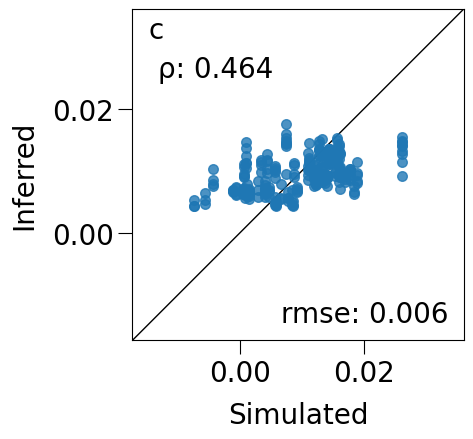

In [4]:
def create_dfe_cnn_1(input_shape: tuple, n_outputs: int): #
    model = Sequential()
    model.add(
        layers.Conv1D(
            filters=64,
            kernel_size=5,
            strides=2,
            input_shape=input_shape,
            activation="relu",
        )
    )
    # model.add(layers.Dropout(0.2))
    model.add(layers.ReLU())
    model.add(layers.Conv1D(filters=32, kernel_size=3, activation="relu")) # Trying to add bias to see if it will work
    
    model.add(layers.AveragePooling2D(pool_size=(20, 1)))

    model.add(layers.Conv1D(filters=16, kernel_size=2, strides=2, activation="relu"))

    model.add(layers.AveragePooling2D(pool_size=(1, 4)))
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(10, activation='relu')) # 10 to 5 dense layer
    model.add(layers.Dense(n_outputs)) # Used to have relu activation
    model.compile(optimizer="adam", loss="mse", metrics=["mean_squared_error"])

    return model, {}


new_day_model, kwargs = create_dfe_cnn_1(train_Dprime_tensors.shape[1:], 3) 
kwargs.update(
    x=train_Dprime_tensors,
    y=train_Dprime_labels,
    epochs=30,
)

callback = callbacks.EarlyStopping(monitor="val_loss", patience=5)
new_day_model.fit(**kwargs, callbacks=[callback])

plot_LD_results(new_day_model, test_dprime_tensor, test_dprime_label, "./Try16_with_30_epochs")